In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("data/sz.csv")
dataset = df.loc[:, "highest_price"].values
df.columns.values[1:]

array(['open_price', 'close_price', 'lowest_price', 'highest_price',
       'turnover_volume', 'turnover_amount', 'amplitude',
       'amplitude_up_down', 'amount_up_down', 'turnover_rate'],
      dtype=object)

In [8]:
df

,date,open_price,close_price,lowest_price,highest_price,turnover_volume,turnover_amount,amplitude,amplitude_up_down,amount_up_down,turnover_rate
0,1991-04-03,988.05,988.05,988.05,988.05,1.0,1.000000e+04,0.00,0.00,0.00,0.00
1,1991-04-04,983.11,983.11,983.11,983.11,523.0,7.610000e+05,0.00,-0.50,-4.94,0.00
2,1991-04-05,978.27,978.27,978.27,978.27,107.0,1.500000e+05,0.00,-0.49,-4.84,0.00
3,1991-04-06,973.42,973.42,973.42,973.42,102.0,1.590000e+05,0.00,-0.50,-4.85,0.00
4,1991-04-08,968.57,968.57,968.57,968.57,57.0,8.400000e+04,0.00,-0.50,-4.85,0.00
...,...,...,...,...,...,...,...,...,...,...,...
7973,2023-10-23,9552.55,9425.98,9552.55,9373.76,383207568.0,4.170909e+11,1.87,-1.51,-144.38,1.69
7974,2023-10-24,9458.33,9483.90,9523.90,9380.79,401263786.0,4.641597e+11,1.52,0.61,57.92,1.77
7975,2023-10-25,9573.67,9528.31,9617.67,9524.82,440145243.0,5.109298e+11,0.98,0.47,44.41,1.94
7976,2023-10-26,9470.49,9566.10,9571.16,9432.84,435715343.0,5.101894e+11,1.45,0.40,37.79,1.92


In [9]:
dataset

array([ 988.05,  983.11,  978.27, ..., 9524.82, 9432.84, 9513.32])

In [5]:
dates = pd.date_range('2010-10-11','2017-10-11',freq = 'B')   # 生成时间序列，频率为工作日

In [6]:
dates

DatetimeIndex(['2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14',
               '2010-10-15', '2010-10-18', '2010-10-19', '2010-10-20',
               '2010-10-21', '2010-10-22',
               ...
               '2017-09-28', '2017-09-29', '2017-10-02', '2017-10-03',
               '2017-10-04', '2017-10-05', '2017-10-06', '2017-10-09',
               '2017-10-10', '2017-10-11'],
              dtype='datetime64[ns]', length=1828, freq='B')

In [10]:
np.sum(df.isnull())

D:\APPS\Python\3.11\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


date                 0
open_price           0
close_price          0
lowest_price         0
highest_price        0
turnover_volume      0
turnover_amount      0
amplitude            0
amplitude_up_down    0
amount_up_down       0
turnover_rate        0
dtype: int64

In [57]:
# 数据缩放
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  
cols = df.columns.values[1:]
for col in cols:                           # 这里不能进行统一进行缩放，因为fit_transform返回值是numpy类型
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
#df['close_price'].values.reshape(-1, 1)

In [58]:
# 将下一日的收盘价作为本日的标签
df['target'] = df['close_price'].shift(-1)   
df.tail()

,date,open_price,close_price,lowest_price,highest_price,turnover_volume,turnover_amount,amplitude,amplitude_up_down,amount_up_down,turnover_rate,target
7973,2023-10-23,-0.044422,-0.056548,-0.046989,-0.045309,0.006793,-0.251859,-0.833482,-0.157719,-0.098064,0.005952,-0.050492
7974,2023-10-24,-0.054261,-0.050492,-0.049974,-0.044562,0.054231,-0.167431,-0.864648,-0.069146,0.060700,0.053571,-0.045849
7975,2023-10-25,-0.042217,-0.045849,-0.040203,-0.029245,0.156384,-0.083539,-0.912734,-0.074995,0.050097,0.154762,-0.041898
7976,2023-10-26,-0.052991,-0.041898,-0.045050,-0.039026,0.144745,-0.084867,-0.870882,-0.077919,0.044902,0.142857,-0.020491
7977,2023-10-27,-0.046187,-0.020491,-0.020609,-0.030468,0.254112,0.038014,-0.727516,-0.005222,0.175923,0.255952,NaN


In [59]:
np.sum(df.isnull())

D:\APPS\Python\3.11\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


date                 0
open_price           0
close_price          0
lowest_price         0
highest_price        0
turnover_volume      0
turnover_amount      0
amplitude            0
amplitude_up_down    0
amount_up_down       0
turnover_rate        0
target               1
dtype: int64

In [60]:
df = df.dropna()
df

,date,open_price,close_price,lowest_price,highest_price,turnover_volume,turnover_amount,amplitude,amplitude_up_down,amount_up_down,turnover_rate,target
0,1991-04-03,-0.938736,-0.938778,-0.939445,-0.937093,-1.000000,-1.000000,-1.000000,-0.094631,0.015245,-1.000000,-0.939294
1,1991-04-04,-0.939252,-0.939294,-0.939960,-0.937619,-0.999999,-0.999999,-1.000000,-0.115521,0.011368,-1.000000,-0.939800
2,1991-04-05,-0.939757,-0.939800,-0.940464,-0.938133,-1.000000,-1.000000,-1.000000,-0.115103,0.011446,-1.000000,-0.940307
3,1991-04-06,-0.940264,-0.940307,-0.940969,-0.938649,-1.000000,-1.000000,-1.000000,-0.115521,0.011438,-1.000000,-0.940814
4,1991-04-08,-0.940770,-0.940814,-0.941475,-0.939165,-1.000000,-1.000000,-1.000000,-0.115521,0.011438,-1.000000,-0.941320
...,...,...,...,...,...,...,...,...,...,...,...,...
7972,2023-10-20,-0.038915,-0.041452,-0.035187,-0.026074,-0.032764,-0.238869,-0.897596,-0.131398,-0.051251,-0.035714,-0.056548
7973,2023-10-23,-0.044422,-0.056548,-0.046989,-0.045309,0.006793,-0.251859,-0.833482,-0.157719,-0.098064,0.005952,-0.050492
7974,2023-10-24,-0.054261,-0.050492,-0.049974,-0.044562,0.054231,-0.167431,-0.864648,-0.069146,0.060700,0.053571,-0.045849
7975,2023-10-25,-0.042217,-0.045849,-0.040203,-0.029245,0.156384,-0.083539,-0.912734,-0.074995,0.050097,0.154762,-0.041898


In [61]:
import torch.nn as nn

input_dim = 4      # 数据的特征数
hidden_dim = 32    # 隐藏层的神经元个数
num_layers = 2     # LSTM的层数
output_dim = 1     # 预测值的特征数
                   #（这是预测股票价格，所以这里特征数是1，如果预测一个单词，那么这里是one-hot向量的编码长度）
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer 在LSTM后再加一个全连接层，因为是回归问题，所以不能在线性层后加激活函数
        self.fc = nn.Linear(hidden_dim, output_dim) 

    def forward(self, x):
        # Initialize hidden state with zeros   
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_() 
        # 这里x.size(0)就是batch_size

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # One time step
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out) 

        return out

In [64]:
# 创建两个列表，用来存储数据的特征和标签
data_feat, data_target = [],[]

# 设每条数据序列有20组数据
seq = 20

for index in range(len(df) - seq):
    # 构建特征集
    data_feat.append(df[['open_price', 'highest_price', 'lowest_price', 'close_price']][index: index + seq].values)
    # 构建target集
    data_target.append(df['target'][index:index + seq])

# 将特征集和标签集整理成numpy数组
data_feat = np.array(data_feat)
data_target = np.array(data_target)

In [65]:
data_feat

array([[[-9.38736182e-01, -9.37093327e-01, -9.39444905e-01,
         -9.38777697e-01],
        [-9.39252022e-01, -9.37618675e-01, -9.39959673e-01,
         -9.39294200e-01],
        [-9.39757420e-01, -9.38133388e-01, -9.40464021e-01,
         -9.39800247e-01],
        ...,
        [-9.47118058e-01, -9.45629697e-01, -9.47809369e-01,
         -9.47170344e-01],
        [-9.47584820e-01, -9.46105062e-01, -9.48275161e-01,
         -9.47637706e-01],
        [-9.48051582e-01, -9.46580427e-01, -9.48740954e-01,
         -9.48105068e-01]],

       [[-9.39252022e-01, -9.37618675e-01, -9.39959673e-01,
         -9.39294200e-01],
        [-9.39757420e-01, -9.38133388e-01, -9.40464021e-01,
         -9.39800247e-01],
        [-9.40263862e-01, -9.38649165e-01, -9.40969411e-01,
         -9.40307340e-01],
        ...,
        [-9.47584820e-01, -9.46105062e-01, -9.48275161e-01,
         -9.47637706e-01],
        [-9.48051582e-01, -9.46580427e-01, -9.48740954e-01,
         -9.48105068e-01],
        [-9.485

In [66]:
data_target

array([[-0.9392942 , -0.93980025, -0.94030734, ..., -0.94763771,
        -0.94810507, -0.94857347],
       [-0.93980025, -0.94030734, -0.94081443, ..., -0.94810507,
        -0.94857347, -0.94904084],
       [-0.94030734, -0.94081443, -0.94132048, ..., -0.94857347,
        -0.94904084, -0.94950715],
       ...,
       [ 0.01661435,  0.01104469,  0.00155212, ..., -0.04145248,
        -0.05654816, -0.05049232],
       [ 0.01104469,  0.00155212,  0.02215682, ..., -0.05654816,
        -0.05049232, -0.04584903],
       [ 0.00155212,  0.02215682,  0.01608007, ..., -0.05049232,
        -0.04584903, -0.04189789]])

In [67]:
# 这里按照8:2的比例划分训练集和测试集
test_set_size = int(np.round(0.2 * df.shape[0]))  # np.round(1)是四舍五入，
train_size = data_feat.shape[0] - (test_set_size) 
print(test_set_size)  # 输出测试集大小
print(train_size)     # 输出训练集大小

1595
6362


In [68]:
import torch
trainX = torch.from_numpy(data_feat[:train_size].reshape(-1,seq,4)).type(torch.Tensor)   
# 这里第一个维度自动确定，我们认为其为batch_size，因为在LSTM类的定义中，设置了batch_first=True
testX  = torch.from_numpy(data_feat[train_size:].reshape(-1,seq,4)).type(torch.Tensor)
trainY = torch.from_numpy(data_target[:train_size].reshape(-1,seq,1)).type(torch.Tensor)
testY  = torch.from_numpy(data_target[train_size:].reshape(-1,seq,1)).type(torch.Tensor)

In [69]:
print('x_train.shape = ',trainX.shape)
print('y_train.shape = ',trainY.shape)
print('x_test.shape = ',testX.shape)
print('y_test.shape = ',testY.shape)

x_train.shape =  torch.Size([6362, 20, 4])
y_train.shape =  torch.Size([6362, 20, 1])
x_test.shape =  torch.Size([1595, 20, 4])
y_test.shape =  torch.Size([1595, 20, 1])


In [71]:
# 因为数据量不大，所以这里就不再划分batch，即认为batch_size=1442，
# 这里只是演示一下数据导入器，我们并不使用
batch_size=1442
train = torch.utils.data.TensorDataset(trainX,trainY)
test = torch.utils.data.TensorDataset(testX,testY)
train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [73]:
# 实例化模型
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# 定义优化器和损失函数
optimiser = torch.optim.Adam(model.parameters(), lr=0.01) # 使用Adam优化算法
loss_fn = torch.nn.MSELoss(size_average=True)             # 使用均方差作为损失函数

# 设定数据遍历次数
num_epochs = 100

# 打印模型结构
print(model)


LSTM(
  (lstm): LSTM(4, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [74]:
# 打印模型各层的参数尺寸
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

torch.Size([128, 4])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [75]:
# train model
hist = np.zeros(num_epochs)
for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    # model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(trainX)

    loss = loss_fn(y_train_pred, trainY)
    if (t + 1) % 10 == 0:                  # 每训练十次，打印一次均方差
        print("Epoch ", t + 1, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs 将梯度归零
    optimiser.zero_grad()

    # Backward pass
    loss.backward()
    
    # Update parameters
    optimiser.step()

Epoch  9 MSE:  0.06428732722997665
Epoch  19 MSE:  0.022511672228574753
Epoch  29 MSE:  0.008696486242115498
Epoch  39 MSE:  0.0039534601382911205
Epoch  49 MSE:  0.0027906387113034725
Epoch  59 MSE:  0.0018687124829739332
Epoch  69 MSE:  0.0013945840764790773
Epoch  79 MSE:  0.0011232610559090972
Epoch  89 MSE:  0.000969809596426785
Epoch  99 MSE:  0.0008668224909342825


In [40]:
num_epochs

100

In [76]:
# 计算训练得到的模型在训练集上的均方差
y_train_pred = model(trainX)
loss_fn(y_train_pred, trainY).item()

0.00085638981545344

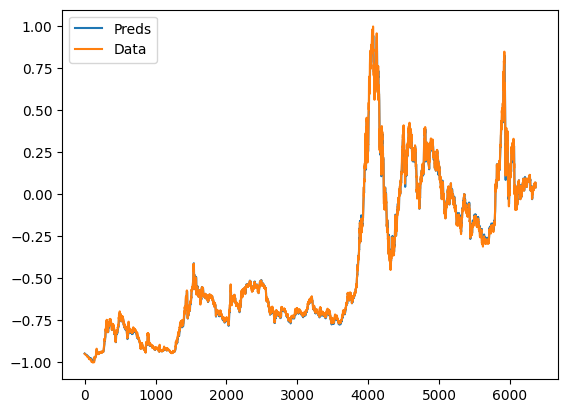

In [77]:
"训练集效果图"
# 无论是真实值，还是模型的输出值，它们的维度均为（batch_size, seq, 1），seq=20
# 我们的目的是用前20天的数据预测今天的股价，所以我们只需要每个数据序列中第20天的标签即可
# 因为前面用了使用DataFrame中shift方法，所以第20天的标签，实际上就是第21天的股价
pred_value = y_train_pred.detach().numpy()[:,-1,0]       
true_value = trainY.detach().numpy()[:,-1,0] 

plt.plot(pred_value, label="Preds")    # 预测值
plt.plot(true_value, label="Data")    # 真实值
plt.legend()
plt.show()

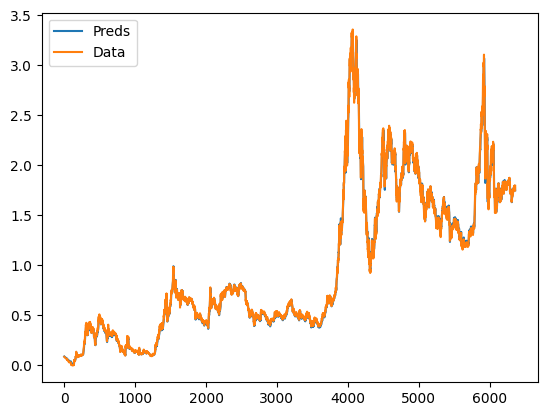

In [78]:
# 纵坐标还有负的，因为前面进行缩放，现在让数据还原成原来的大小
# invert predictions
pred_value = scaler.inverse_transform(pred_value.reshape(-1, 1))
true_value = scaler.inverse_transform(true_value.reshape(-1, 1))

plt.plot(pred_value, label="Preds")    # 预测值
plt.plot(true_value, label="Data")    # 真实值
plt.legend()
plt.show()